### 导入必要的库，简单设置

In [1]:
import pandas as pd
pd.options.display.max_columns=99
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Microsoft YaHei Mono')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#加载我们清理好的数据
df=pd.read_excel("淄博信息港二手房信息20160110.xlsx")
df.head()

,区县,小区,类型,建造年代,装修,朝向,发布时间,价格,面积,车库,储藏室,室,厅,卫,楼层,总楼层
0,张店区,惠泽苑,住宅,2010.0,毛坯,南北,2015-11-06,51.0,120.0,15,0,2,2,1,4.0,5.0
1,张店区,曹村创业园一号楼 曹三村 急需用钱超低价出售中介勿扰,住宅,2006.0,简装修,南,2015-05-22,14.5,73.0,0,6,2,1,1,4.0,6.0
2,张店区,南苑绿洲一区,住宅,2011.0,简装修,南,2013-09-18,32.0,82.0,0,10,2,1,1,2.0,6.0
3,张店区,阳光馨园,住宅,2009.0,中等装修,南,2015-10-23,51.0,75.0,25,0,3,1,1,1.0,6.0
4,张店区,张店齐悦国际，改合同（划片祥瑞苑小学、张店八中）,住宅,2015.0,毛坯,东,2016-01-06,98.0,140.0,18,20,3,2,1,18.0,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20161 entries, 0 to 20160
Data columns (total 16 columns):
区县      20159 non-null object
小区      17869 non-null object
类型      20160 non-null object
建造年代    20160 non-null float64
装修      20159 non-null object
朝向      20102 non-null object
发布时间    20160 non-null datetime64[ns]
价格      20103 non-null float64
面积      20160 non-null float64
车库      20161 non-null int64
储藏室     20161 non-null int64
室       20161 non-null int64
厅       20161 non-null int64
卫       20161 non-null int64
楼层      20154 non-null float64
总楼层     20154 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(5), object(5)
memory usage: 2.6+ MB


##### 删除同一个小区不超过10套房源的,以及信息不完整的,或者类型不是住宅的记录

In [5]:
s=df["小区"].value_counts()
s=s.loc[s>=10]
df=df.loc[df["小区"].isin(s.index)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15566 entries, 6 to 20159
Data columns (total 16 columns):
区县      15566 non-null object
小区      15566 non-null object
类型      15566 non-null object
建造年代    15566 non-null float64
装修      15566 non-null object
朝向      15541 non-null object
发布时间    15566 non-null datetime64[ns]
价格      15548 non-null float64
面积      15566 non-null float64
车库      15566 non-null int64
储藏室     15566 non-null int64
室       15566 non-null int64
厅       15566 non-null int64
卫       15566 non-null int64
楼层      15563 non-null float64
总楼层     15563 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.dropna(inplace= True)
df=df.loc[df["类型"]=='住宅']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15468 entries, 6 to 20159
Data columns (total 16 columns):
区县      15468 non-null object
小区      15468 non-null object
类型      15468 non-null object
建造年代    15468 non-null float64
装修      15468 non-null object
朝向      15468 non-null object
发布时间    15468 non-null datetime64[ns]
价格      15468 non-null float64
面积      15468 non-null float64
车库      15468 non-null int64
储藏室     15468 non-null int64
室       15468 non-null int64
厅       15468 non-null int64
卫       15468 non-null int64
楼层      15468 non-null float64
总楼层     15468 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
df["单价"]=(df["价格"]/df["面积"]*10000).round()
df["房龄"]=2016-df["建造年代"]
df.head()

,区县,小区,类型,建造年代,装修,朝向,发布时间,价格,面积,车库,储藏室,室,厅,卫,楼层,总楼层,单价,房龄
6,张店区,江南豪庭,住宅,2006,精装修,南,2013-11-28,85,120,0,10,3,2,1,6,6,7083,10
7,张店区,金域东山,住宅,2015,毛坯,东,2016-01-08,85,162,15,52,4,2,2,4,6,5247,1
8,张店区,创业颐丰花园,住宅,2011,毛坯,南,2013-10-24,126,176,40,20,3,2,2,18,21,7159,5
11,张店区,黄金国际,住宅,2009,精装修,东,2015-10-24,108,133,0,0,3,2,1,8,17,8120,7
12,张店区,迎春园,住宅,1995,简装修,南,2016-01-10,42,85,0,0,3,1,1,5,6,4941,21


# 这个数据能解答哪些问题呢？

## 1. 房价变化趋势?

In [8]:
df.set_index('发布时间' ,inplace=True)

In [9]:
df.pivot_table(columns=[df.index.year,df.index.month],values='小区',aggfunc=np.count_nonzero)

2011  10       1
      11       1
2012  4        4
      6        1
      9        1
      11       1
      12       1
2013  3        3
      4        2
      5        4
      6        5
      7        1
      8        1
      9        5
      10       4
      11       9
      12       2
2014  1        5
      2        4
      3        9
      4        6
      5        3
      6        2
      7        5
      8        3
      9        8
      10      11
      11      32
      12      82
2015  1       41
      2       10
      3       26
      4       32
      5       51
      6       80
      7      105
      8      176
      9      359
      10    1414
      11    2559
      12    5645
2016  1     4754
dtype: int64

- 很明显，已经售出的房子就会关闭信息，所以我们看不到之前的信息了，通过这些数据没法了解趋势.
- 接下来我们再去掉挂了超过4个月的数据

In [10]:
df=df['2015-10':'2016-01']
df

,区县,小区,类型,建造年代,装修,朝向,价格,面积,车库,储藏室,室,厅,卫,楼层,总楼层,单价,房龄
发布时间,,,,,,,,,,,,,,,,,
2016-01-08,张店区,金域东山,住宅,2015,毛坯,东,85.0,162,15,52,4,2,2,4,6,5247,1
2015-10-24,张店区,黄金国际,住宅,2009,精装修,东,108.0,133,0,0,3,2,1,8,17,8120,7
2016-01-10,张店区,迎春园,住宅,1995,简装修,南,42.0,85,0,0,3,1,1,5,6,4941,21
2016-01-10,张店区,华瑞园,住宅,1998,简装修,南,42.0,100,0,0,3,2,1,6,6,4200,18
2016-01-10,张店区,丽景苑,住宅,2000,精装修,南北,75.0,110,0,0,3,2,1,3,6,6818,16
2016-01-10,张店区,凯瑞安园,住宅,2001,毛坯,东,76.0,130,0,0,3,2,1,1,6,5846,15
2016-01-10,张店区,美达花园,住宅,2007,简装修,南,74.0,124,0,0,4,2,1,5,7,5968,9
2016-01-06,张店区,凯瑞安园,住宅,2004,毛坯,东,51.0,90,0,20,3,2,1,6,7,5667,12
2015-10-28,张店区,世纪花园,住宅,2008,毛坯,东,40.0,80,0,0,1,2,1,3,9,5000,8


## 2. 各个小区房子大概是多少钱? 只看记录数大于100的小区

In [11]:
s=df["小区"].value_counts()
s=s.loc[s>100]
s

世纪花园       1014
黄金国际        838
江南豪庭        512
龙泰苑世嘉       507
怡海世家        497
中润华侨城南区     492
龙凤苑         422
颐丰花园        388
华侨城         332
丽景苑         286
创业颐丰花园      268
凯瑞安园        254
丽景翠苑        251
美达世纪华庭      216
恒生城市花园      204
恒兴花园        176
中润·华侨城      176
远景花园        171
体坛小区        157
阳光花园        151
凯瑞碧园        150
金石晶城        145
时代名都        137
盛世名苑        136
凯瑞景园        133
紫荆园         131
美达花园        131
绿杉园         131
金花村         126
名尚城市广场      125
瑞丰苑         122
温馨家园        121
道庄小区        121
华瑞园         121
荷香园         118
市府三宿舍       116
五里桥生活区      107
中德亚运村       105
樱红村         102
富贵家园        101
Name: 小区, dtype: int64

In [12]:
new_df=df.loc[df["小区"].isin(s.index)]
new_df

,区县,小区,类型,建造年代,装修,朝向,价格,面积,车库,储藏室,室,厅,卫,楼层,总楼层,单价,房龄
发布时间,,,,,,,,,,,,,,,,,
2015-10-24,张店区,黄金国际,住宅,2009,精装修,东,108.0,133,0,0,3,2,1,8,17,8120,7
2016-01-10,张店区,华瑞园,住宅,1998,简装修,南,42.0,100,0,0,3,2,1,6,6,4200,18
2016-01-10,张店区,丽景苑,住宅,2000,精装修,南北,75.0,110,0,0,3,2,1,3,6,6818,16
2016-01-10,张店区,凯瑞安园,住宅,2001,毛坯,东,76.0,130,0,0,3,2,1,1,6,5846,15
2016-01-10,张店区,美达花园,住宅,2007,简装修,南,74.0,124,0,0,4,2,1,5,7,5968,9
2016-01-06,张店区,凯瑞安园,住宅,2004,毛坯,东,51.0,90,0,20,3,2,1,6,7,5667,12
2015-10-28,张店区,世纪花园,住宅,2008,毛坯,东,40.0,80,0,0,1,2,1,3,9,5000,8
2016-01-10,张店区,中润华侨城南区,住宅,2011,精装修,南,170.0,280,0,0,5,3,2,11,12,6071,5
2016-01-10,张店区,美达世纪华庭,住宅,2013,毛坯,南,95.0,130,0,0,3,2,1,10,11,7308,3


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9791 entries, 2015-10-24 to 2015-10-12
Data columns (total 17 columns):
区县      9791 non-null object
小区      9791 non-null object
类型      9791 non-null object
建造年代    9791 non-null float64
装修      9791 non-null object
朝向      9791 non-null object
价格      9791 non-null float64
面积      9791 non-null float64
车库      9791 non-null int64
储藏室     9791 non-null int64
室       9791 non-null int64
厅       9791 non-null int64
卫       9791 non-null int64
楼层      9791 non-null float64
总楼层     9791 non-null float64
单价      9791 non-null float64
房龄      9791 non-null float64
dtypes: float64(7), int64(5), object(5)
memory usage: 1.3+ MB


In [14]:
tmp=new_df.groupby("小区")["单价"].mean()

In [15]:
tmp.sort_values(ascending=False,inplace=True)

In [16]:
tmp.round()

小区
龙泰苑世嘉      7625
龙凤苑        7619
黄金国际       7506
美达世纪华庭     7431
金石晶城       7287
中润华侨城南区    7090
华侨城        6979
江南豪庭       6975
颐丰花园       6949
创业颐丰花园     6928
怡海世家       6902
中润·华侨城     6864
名尚城市广场     6803
恒兴花园       6717
凯瑞安园       6586
市府三宿舍      6572
远景花园       6515
世纪花园       6506
凯瑞景园       6499
凯瑞碧园       6412
盛世名苑       6382
时代名都       6380
绿杉园        6330
美达花园       6220
恒生城市花园     6193
阳光花园       6116
金花村        6043
瑞丰苑        5972
丽景苑        5823
温馨家园       5793
荷香园        5784
紫荆园        5630
丽景翠苑       5582
富贵家园       5538
华瑞园        5445
中德亚运村      5424
五里桥生活区     5271
体坛小区       5241
樱红村        5093
道庄小区       5088
Name: 单价, dtype: float64

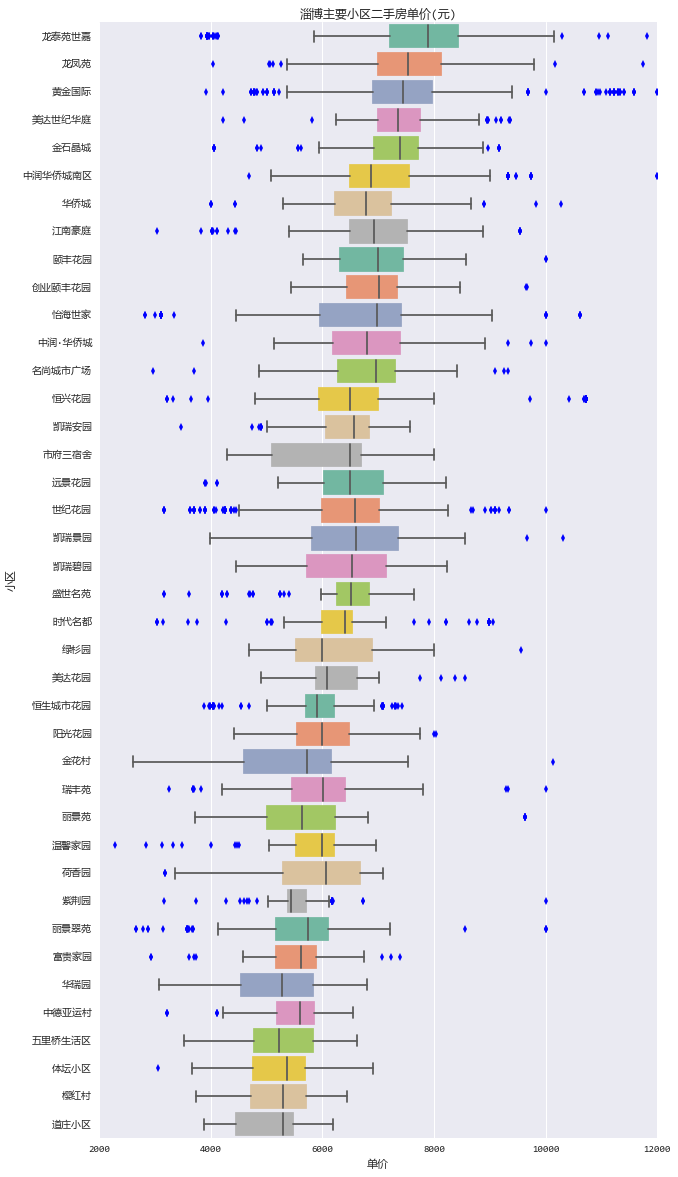

In [18]:
plt.figure(figsize=(10,20))
g=sns.boxplot(data=new_df,orient="h",y="小区",x="单价",order=tmp.index,palette="Set2")
g.set(xlim=(2000,12000))
plt.title('淄博主要小区二手房单价(元)')
plt.savefig('淄博主要小区二手房单价.png')